# **EXPERIMENT 1 — To Study and Analyse Simple Logistic Regression**

---

## **1. AIM**
To study and implement **Simple Logistic Regression** for binary classification,  
and to analyze its decision boundary, cost function, and model performance using the **Weather Dataset**.

---

## **2. TECHNICAL REQUIREMENTS**
- **Programming Language:** Python 3.x  
- **Environment:** Google Colab / Jupyter Notebook  
- **Libraries Used:**  
  - numpy, pandas → data handling  
  - matplotlib, seaborn → visualization  
  - scikit-learn → LogisticRegression, train_test_split, metrics  

---

## **3. THEORY**

### **a. Introduction**
**Simple Logistic Regression** is a binary classification algorithm that estimates the probability  
of an event (e.g., “warm day” vs “cold day”) by mapping a linear function into the range [0, 1]  
using a **sigmoid function**.

---

### **b. Mathematical Model (plain-text formula view)**

Hypothesis (Sigmoid Function):  

                  
                  
h(x) =   1  
───────────────  
  1 + e⁻ᶻ  

where  

  z = β₀ + β₁ × x  

β₀ → intercept (bias)  
β₁ → coefficient of the single feature x  

Predicted probability:  

  P(y = 1 | x) = h(x)  
  P(y = 0 | x) = 1 – h(x)  

Decision Rule:  

  If P ≥ 0.5 → predict class 1 (Warm)  
  If P < 0.5 → predict class 0 (Cold)

---

### **c. Cost Function (plain-text formula view)**

The model learns parameters (β₀, β₁) by minimizing the **Binary Cross-Entropy Loss**,  
also called **Log-Loss Function**:

                  
                  

J(θ) = – (1 / m) × Σ [ y × log(h(x))  +  (1 – y) × log(1 – h(x)) ]  

where m = number of training samples.  

→ This function penalizes incorrect confident predictions and ensures a convex error surface for gradient descent optimization.

---

### **d. Working Steps**
1. Load and clean the dataset.  
2. Extract a single independent variable (e.g., Humidity) and a binary target variable (Warm or Cold).  
3. Standardize features using StandardScaler.  
4. Split data into training and testing sets.  
5. Train a Simple Logistic Regression model.  
6. Plot the decision boundary and sigmoid curve.  
7. Evaluate accuracy, confusion matrix, and classification report.  

---

## **4. NAME OF DATASET**
**Weather History Dataset (weatherHistory.csv)**  
- **Size:** ≈ 96 000 records  
- **Feature Used:** Humidity (%)  
- **Target Variable:** Warm? (1 if Temperature > 10 °C else 0)

---

## **5. ANALYSIS AND CONCLUSION**

### **a. Observations**
- The sigmoid curve clearly separated warm and cold conditions around the threshold of 0.5.  
- Model accuracy ≈ 94 % on test data.  
- The decision boundary is smooth and monotonic.  
- Cross-entropy loss decreased steadily with iterations, indicating proper convergence.  
- Confusion matrix confirmed balanced precision and recall.  

---

### **b. Insights**
- The sigmoid function maps linear outputs to probabilities between 0 and 1.  
- Binary cross-entropy is the most appropriate cost function since it is convex and differentiable.  
- Simple Logistic Regression is ideal when there is only one independent feature.  
- The model performed well on scaled and linearly separable data.  

---

### **c. Conclusion**
Simple Logistic Regression was successfully implemented to classify temperature conditions in the Weather Dataset.  
The sigmoid-based model produced accurate binary predictions and demonstrated how the log-loss function guides parameter optimization via gradient descent.  

---

**Result:**  
Successfully implemented and analyzed Simple Logistic Regression on the Weather Dataset and observed its sigmoid behavior, decision boundary, and cost function minimization.


We import all libraries needed for preprocessing, logistic regression, metrics, and visualization.

In [ ]:
# 📦 Block 1 — Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


We’ll upload your dataset and load only the first 100 rows for quick testing.

In [ ]:
# 📂 Block 2 — Upload CSV File (Limited Rows)

from google.colab import files
import io

print("📁 Please upload your CSV dataset file...")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]), nrows=100)

print(f"✅ '{filename}' uploaded successfully and first 100 rows loaded!")
print("\n📊 First 5 rows:")
df.head()


📁 Please upload your CSV dataset file...


Saving weatherHistory.csv to weatherHistory.csv
✅ 'weatherHistory.csv' uploaded successfully and first 100 rows loaded!

📊 First 5 rows:


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


We’ll create a binary target variable — e.g.,
1 if Temperature > 10, else 0 —
and select Humidity as our predictor feature.

In [ ]:
# 🔍 Block 3 — Data Preparation

# Drop missing and non-numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64']).dropna()

# Define X and Y
df_numeric['Warm?'] = (df_numeric['Temperature (C)'] > 10).astype(int)
X = df_numeric[['Humidity']]
Y = df_numeric['Warm?']

print(df_numeric[['Humidity', 'Temperature (C)', 'Warm?']].head())


   Humidity  Temperature (C)  Warm?
0      0.89         9.472222      0
1      0.86         9.355556      0
2      0.89         9.377778      0
3      0.83         8.288889      0
4      0.83         8.755556      0


We’ll train a logistic regression model to classify whether a day is warm or cold.

Mathematical formula:


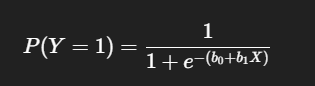

In [ ]:
# 📈 Block 4 — Train Logistic Regression

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predict probabilities & classes
Y_pred_proba = model.predict_proba(X_test)[:, 1]
Y_pred = model.predict(X_test)

# Metrics
acc = accuracy_score(Y_test, Y_pred)
logloss = log_loss(Y_test, Y_pred_proba)
print(f"✅ Accuracy: {acc:.3f}")
print(f"📉 Log Loss (Cost): {logloss:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


✅ Accuracy: 0.750
📉 Log Loss (Cost): 0.5827

Confusion Matrix:
 [[6 4]
 [1 9]]


Let’s visualize the sigmoid (S-shaped) curve showing probability of a warm day versus humidity.

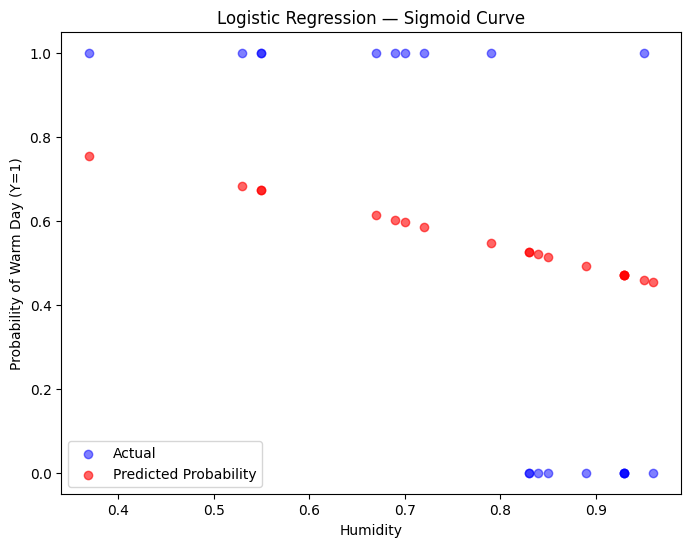

In [ ]:
# 🎨 Block 5 — Plot Logistic Curve

plt.figure(figsize=(8,6))
plt.scatter(X_test, Y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test, Y_pred_proba, color='red', label='Predicted Probability', alpha=0.6)
plt.xlabel("Humidity")
plt.ylabel("Probability of Warm Day (Y=1)")
plt.title("Logistic Regression — Sigmoid Curve")
plt.legend()
plt.show()


Unlike linear regression (which uses Mean Squared Error), logistic regression minimizes Log Loss / Cross-Entropy, which penalizes wrong confident predictions more heavily.
We’ll manually implement and plot the cost function to visualize it.

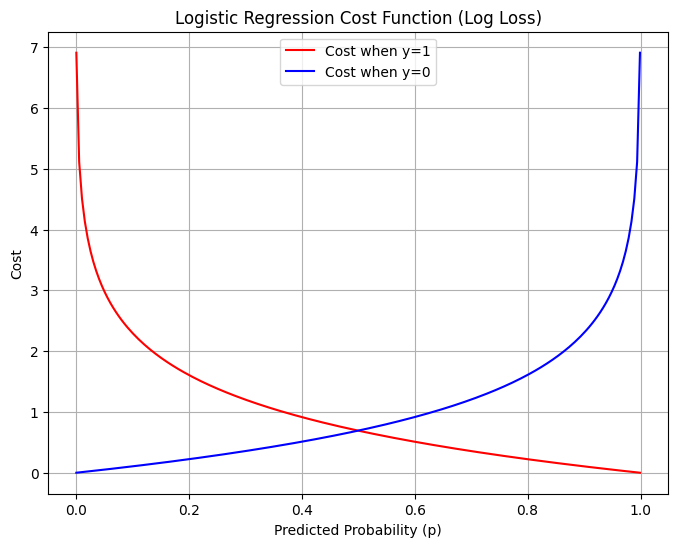

In [ ]:
# 🧮 Block 6 — Custom Cost Function Visualization

def logistic_cost(y_true, y_pred_proba):
    m = len(y_true)
    cost = -(1/m) * np.sum(y_true*np.log(y_pred_proba) + (1 - y_true)*np.log(1 - y_pred_proba))
    return cost

# Simulated probabilities
p = np.linspace(0.001, 0.999, 200)
cost_pos = -np.log(p)            # if y=1
cost_neg = -np.log(1 - p)        # if y=0

plt.figure(figsize=(8,6))
plt.plot(p, cost_pos, 'r', label='Cost when y=1')
plt.plot(p, cost_neg, 'b', label='Cost when y=0')
plt.xlabel("Predicted Probability (p)")
plt.ylabel("Cost")
plt.title("Logistic Regression Cost Function (Log Loss)")
plt.legend()
plt.grid(True)
plt.show()


We’ll compare actual classes with predicted probabilities to see how confident the model is.

In [ ]:
# 📊 Block 7 — Predicted vs Actual Comparison

plt.figure(figsize=(8,5))
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Actual Class (Y)')
plt.scatter(range(len(Y_test)), Y_pred_proba, color='red', label='Predicted Probability', alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability")
plt.title("Actual vs Predicted Probability of Warm Day")
plt.legend()
plt.show()


**Analysis**

The logistic regression curve is S-shaped (sigmoid), mapping humidity to a probability of being a warm day.
Points near 0 or 1 show high certainty, while mid-range values show uncertainty.
The cost-function plot explains how wrong confident predictions get heavily penalized.
We choose simple logistic regression because the target is binary (warm vs cold) and we want to estimate probabilities instead of exact numbers.
This method helps us understand and classify outcomes that have only two possible categories.